In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
def time_signal(file, code):

    import re
    try:
        data = pd.read_csv(f"../../{file}.csv")
        for key in data:
            if re.findall(rf"({code})", key):
                dict_code = key
        unit_conv = 0.0254
        x = data[dict_code] * unit_conv
        return x
    except:
        print('File does not exist or code wrong. Code must be either "DE or "FE" ')

C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


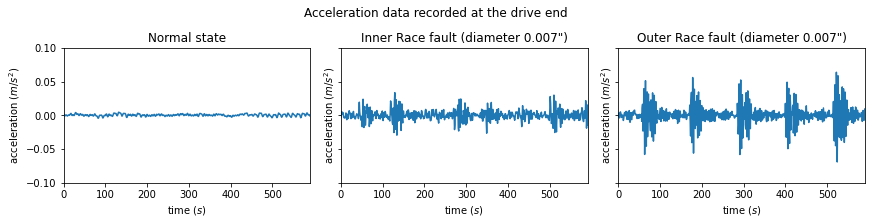

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

normal_sig = time_signal(file='NB', code='DE')
ir_sig = time_signal(file='IR - 7', code='DE') 
or_sig = time_signal(file='OR - 7', code='DE') 

# plotting

fig, (plt1, plt2, plt3) = plt.subplots(1, 3, sharey = True, figsize=(12, 3), constrained_layout=True)
plt1.set_xlabel("time $(s)$")
plt1.set_ylabel("acceleration $(m/s^2)$")
plt1.set_title('Normal state')
plt1.axis((0,591,-0.1,0.1))
plt1.plot(normal_sig)
plt2.set_xlabel("time $(s)$")
plt2.set_ylabel("acceleration $(m/s^2)$")
plt2.set_title('Inner Race fault (diameter 0.007")')
plt2.axis((0,591,-0.1,0.1))
plt2.plot(ir_sig)
plt3.set_xlabel("time $(s)$")
plt3.set_ylabel("acceleration $(m/s^2)$")
plt3.set_title('Outer Race fault (diameter 0.007")')
plt3.axis((0,591,-0.1,0.1))
plt3.plot(or_sig)
fig.suptitle('Acceleration data recorded at the drive end')
fig.show()

In [4]:
# Importing the dataset
dataset = pd.read_csv('../CWRU Dataset-1.csv')
X = dataset.iloc[:, 1:4].values
y = dataset.iloc[:, 0:1].values

In [5]:
dataset.head(5)

,Bearing,Fault Diameter,DE,FE
0,Normal,0.0,0.064254,0.038625
1,Normal,0.0,0.063002,0.096769
2,Normal,0.0,-0.004381,0.127382
3,Normal,0.0,-0.035882,0.144640
4,Normal,0.0,-0.023991,0.086702


In [6]:
#Retrieve Random Data
dataset.sample(10)

,Bearing,Fault Diameter,DE,FE
314162,"Outer Race (0.007"")",0.007,-0.242028,0.570753
112832,Normal,0.000,-0.041306,0.094509
263375,"Outer Race (0.007"")",0.007,-0.448321,-0.067389
139042,"Inner Race (0.007"")",0.007,0.069035,-0.243464
283021,"Outer Race (0.007"")",0.007,2.049931,0.398787
333626,"Outer Race (0.007"")",0.007,0.021523,0.030613
208077,"Inner Race (0.007"")",0.007,0.140019,0.028147
293710,"Outer Race (0.007"")",0.007,-0.190861,-0.349684
218658,"Inner Race (0.007"")",0.007,-0.093075,-0.064307
259655,"Outer Race (0.007"")",0.007,-0.267612,0.102522


In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_y = LabelEncoder()
y[:,0] = labelencoder_y.fit_transform(y[:,0])
ct = ColumnTransformer([("Bearing", OneHotEncoder(), [0])],    remainder = 'passthrough')
y = ct.fit_transform(y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [11]:
classifier = Sequential()

In [12]:
classifier.add(Dense(output_dim = 3, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))

C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=3, units=3)`
  """Entry point for launching an IPython kernel.


In [13]:
classifier.add(Dense(output_dim = 3, kernel_initializer = 'uniform', activation = 'relu'))

C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", units=3)`
  """Entry point for launching an IPython kernel.


In [14]:
classifier.add(Dense(output_dim = 3, kernel_initializer = 'uniform', activation = 'sigmoid'))

C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="sigmoid", units=3)`
  """Entry point for launching an IPython kernel.


In [15]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
model = classifier.fit(X_train, y_train, batch_size = 100, nb_epoch = 100)


C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
290688/290688 [==============================] - 3s 12us/step - loss: 0.3558 - accuracy: 0.7696
Epoch 2/100
290688/290688 [==============================] - 3s 10us/step - loss: 0.3070 - accuracy: 0.7803
Epoch 3/100
290688/290688 [==============================] - 3s 10us/step - loss: 0.3030 - accuracy: 0.7913
Epoch 4/100
290688/290688 [==============================] - 3s 9us/step - loss: 0.3019 - accuracy: 0.7990
Epoch 5/100
290688/290688 [==============================] - 3s 9us/step - loss: 0.2980 - accuracy: 0.7983
Epoch 6/100
290688/290688 [==============================] - 3s 10us/step - loss: 0.2973 - accuracy: 0.7986
Epoch 7/100
290688/290688 [==============================] - 3s 9us/step - loss: 0.2971 - accuracy: 0.7989
Epoch 8/100
290688/290688 [==============================] - 3s 9us/step - loss: 0.2969 - accuracy: 0.7989
Epoch 9/100
290688/290688 [==============================] - 3s 9us/step - loss: 0.2968 - accuracy: 0.7992
Epoch 10/100
290688/290688 [=====

In [17]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

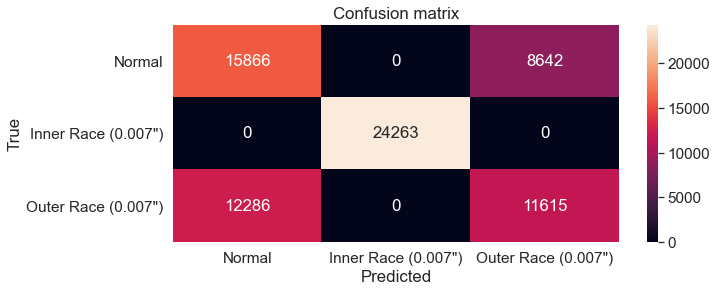

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

index = ['Normal','Inner Race (0.007")', 'Outer Race (0.007")']  
columns = ['Normal','Inner Race (0.007")', 'Outer Race (0.007")']  
cm_df = pd.DataFrame(cm,columns,index)  


plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [19]:
classifier.evaluate(X_test, y_test)

72672/72672 [==============================] - 1s 13us/step


[0.29378101614171426, 0.8080142736434937]

In [20]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['Normal','Inner Race (0.007")', 'Outer Race (0.007")'])
print(cr)

                     precision    recall  f1-score   support

             Normal       0.56      0.65      0.60     24508
Inner Race (0.007")       1.00      1.00      1.00     24263
Outer Race (0.007")       0.57      0.49      0.53     23901

          micro avg       0.71      0.71      0.71     72672
          macro avg       0.71      0.71      0.71     72672
       weighted avg       0.71      0.71      0.71     72672
        samples avg       0.71      0.71      0.71     72672

